In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
data=pd.read_csv("D:\Spam_Project\spam.csv",encoding = "ISO-8859-1")

#EDA

In [64]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [65]:

data=data[['v1','v2']].rename(columns={'v1':'label','v2':'text'})


In [66]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:

data.isnull().sum()

label    0
text     0
dtype: int64

In [68]:
data.shape


(5572, 2)

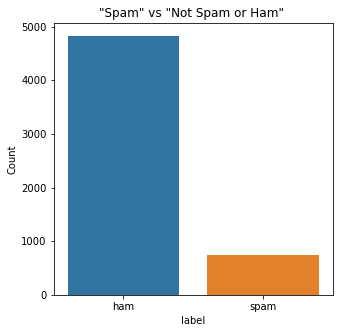

In [69]:
plt.figure(figsize=(5,5))
sns.countplot(x='label', data=data)
plt.title('"Spam" vs "Not Spam or Ham" ')
p = plt.xlabel('label')
p = plt.ylabel('Count')


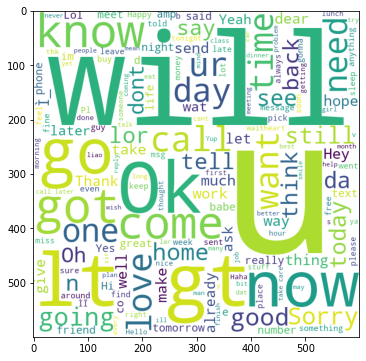

In [70]:
#word cloud for "ham" category
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='white')
words_frequent=wc.generate(data[data['label']=='ham']['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(words_frequent)

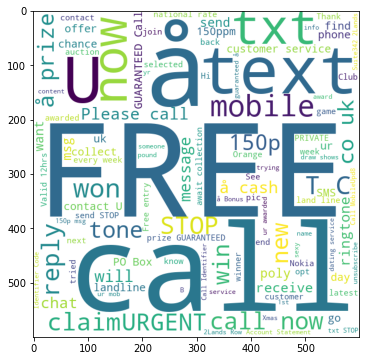

In [71]:
#word cloud for "spam" category
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='white')
words_frequent=wc.generate(data[data['label']=='spam']['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(words_frequent)

#DATA PREPROCESSING

In [72]:
#This is a problem of text classification.This type of problem is solved by "NLP" but we can also solve by using "Machine Learning"
#The topic is ---> "Text Classification"
#Here, 'label'---> dependent variable    and 'messages'----->independent variable

In [73]:
import nltk
import re
nltk.download("stopwords")  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
data.shape

(5572, 2)

In [75]:
corpus=[]

In [38]:
for i in range(0,len(data)):
  review= re.sub('^[a-zA-Z]',' ',data['messages'][i])        
  review=review.lower()                                     
review.split() 
  review=[ps.stem(review) for word in review if not word in stopwords.words('english')]                                                         
  review=''.join(review)
  corpus.append(review)

In [79]:
def datacleaning(text):
    k=''
    sent = re.sub('[^A-Za-z]',' ',text)
    sent = sent.lower()
    sent=sent.strip()
    words = sent.split()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words if word not in stopwords.words('english')]
    k = ' '.join(words)
    
    return k

In [80]:
data['text'].apply(datacleaning)

0       go jurong point crazy available bugis n great ...
1                                   ok lar joke wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf live around though
                              ...                        
5567    nd time try contact u u pound prize claim easy...
5568                               b go esplanade fr home
5569                                pity mood suggestions
5570    guy bitch act like interest buy something else...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

NameError: name 'k' is not defined

In [35]:
#converting text into vector format
#by using sklearn we will use----> 'CountVectorizer' functionality

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [37]:
#Here, we will be using 'max_features' parameter because as we know there will be the words which are occuring more in a column .So we will keep that column only and drop the others in order to avoid the condition of 'overfitting'.
cv=CountVectorizer(max_features=2500)

In [90]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, max_features=2500, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data['text'])
features.shape

(5572, 2500)

In [38]:
#fitting our data

In [91]:
from collections import Counter
p = Counter(" ".join(tfidf.get_feature_names_out()).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

       Word  Frequency
0        ur         30
1      free         28
2    mobile         18
3        ll         17
4        ok         17
5      send         16
6     nokia         16
7     prize         15
8      just         15
9      stop         14
10       gt         14
11     good         14
12      www         13
13      day         13
14      txt         13
15     cash         12
16      new         12
17    claim         12
18      won         11
19      pls         11
20     tone         10
21     week         10
22     time         10
23      win         10
24  contact         10
25     text         10
26       lt         10
27      100          9
28       50          9
29     love          9
30     come          9
31    reply          8
32      did          8
33     want          8
34     draw          8
35     like          8
36      got          8
37      min          7
38      500          7
39      amp          7
40     need          7
41      wid          7
42   camera

In [94]:
X=features.toarray()

In [95]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
X.shape

(5572, 2500)

In [97]:

data['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [98]:

y=pd.get_dummies(data['label'],drop_first=True)

#Spam=1
#ham=0

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0,stratify=y)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 2500)
(1115, 2500)
(4457, 1)
(1115, 1)


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

In [113]:
models = [MultinomialNB(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression(random_state=1)]

In [116]:
entries = []
for model in models:
    print("Model is: {}".format(model))
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    print(confusion_matrix(y_train,train_pred))
    print("Classification report of the {} on train records".format(model))
    print(classification_report(y_train,train_pred))
    
    y_pred=model.predict(X_test)
    y_pred
    print("confusion matrix and classification report of the {} on test records".format(model))
    print(confusion_matrix(y_test,y_pred))
    print("Classification report of the {}".format(model))
    print(classification_report(y_test,y_pred))
    print("--------------------------------------------------------------------------")
  

Model is: MultinomialNB()
[[3859    0]
 [  61  537]]
Classification report of the MultinomialNB() on train records
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       1.00      0.90      0.95       598

    accuracy                           0.99      4457
   macro avg       0.99      0.95      0.97      4457
weighted avg       0.99      0.99      0.99      4457

confusion matrix and classification report of the MultinomialNB() on test records
[[966   0]
 [ 20 129]]
Classification report of the MultinomialNB()
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------------------------------
Model 

#Conclusion
Among all of the Machine Learning Models , Naive Bayes Classifier is showing the good accuracy. All other models are somewhere overfitted.So, I will choose "Naive Bayes" classifier to make a "SMS SPAM PREDICTION MODEL"
